# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [60]:
import pandas as pd

# your code here
df = pd.read_csv('train.csv')  
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [62]:
def num_nans(df):
    return df.isnull().any(axis=1).sum()
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [63]:
def drop_na(df):
    # remove columns with more than 6 NaN values
    # return df.dropna(thresh = len(df) - 6, axis=1)
    # thresh keep only the columns with at least len(df)-200 non-NA values.
    return df.dropna(thresh=len(df)-200, axis=1)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [64]:
def to_numerical(df):
    return df['Sex'].replace(to_replace=['male', 'female'], value=[0, 1])

df['Sex'] = to_numerical(df)
df.head()

/var/folders/8g/v66cb1ld0j9253fc65_df30h0000gn/T/ipykernel_53361/4090327643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = to_numerical(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [65]:
def extract_names(df):
    
    # Last name
    df1 = df["Name"].str.split(",").str[0].tolist() 
    df2 = df["Name"].str.split(",").str[1]
    # Title
    df3= df2.str.split(".").str[0].tolist() 
    df4 = df2.str.split(".").str[1]
    # First Name
    df5 = df4.str.split(" ").str[1].tolist()  
    # Middle Name
    df6 = df4.str.split(pat=" ", n=2).str[2].tolist()
    list_of_tuples = list(zip(df5, df6, df1, df3))
    df9 = pd.DataFrame(list_of_tuples, columns = ['First Name', 'Middle Name', 'Last Name', 'Title'])
    return df9
    
# df = pd.read_csv('train.csv')  
# df1 = df["Name"].str.split(",").str[0].tolist()  # last name
# print("df1:", df1)
# df2 = df["Name"].str.split(",").str[1]
# print("df2:\n", df2)
# df3= df2.str.split(".").str[0].tolist()  # title
# print("df3:\n", df3)
# df4 = df2.str.split(".").str[1]
# print("df4:\n", df4)
# df5 = df4.str.split(" ").str[1].tolist()  # first name
# print("df5:\n", df5)
# df6 = df4.str.split(pat=" ", n=2).str[2].tolist()  # middle name
# print("df6:\n", df6)
# list_of_tuples = list(zip(df5, df6, df1, df3))
# print("list_of_tuples:\n", list_of_tuples)
# df9 = pd.DataFrame(list_of_tuples, columns = ['First Name', 'Middle Name', 'Last Name', 'Title'])
# print("df9:\n", df9)

# df = pd.read_csv('train.csv')  
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [66]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

Text(0, 0.5, 'Average Age')

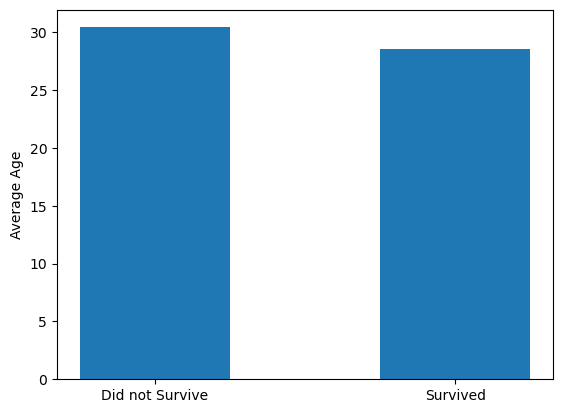

In [67]:
# your code here
import matplotlib.pyplot as plt
# df.groupby('Survived')['Age'].mean()
plt.bar(['Did not Survive', 'Survived'], df.groupby('Survived')['Age'].mean(), 0.5)
plt.ylabel('Average Age')

-> your answer here
This bar graph tells us that the average age does not affect the survival rate too much but some. People who survived from titanic are on average slightly younger than people who did not survive. This indicates that people who are younger have a slightly higher chance to survive than people who are older. 

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

Text(0, 0.5, 'Survival Rate for Male and Female')

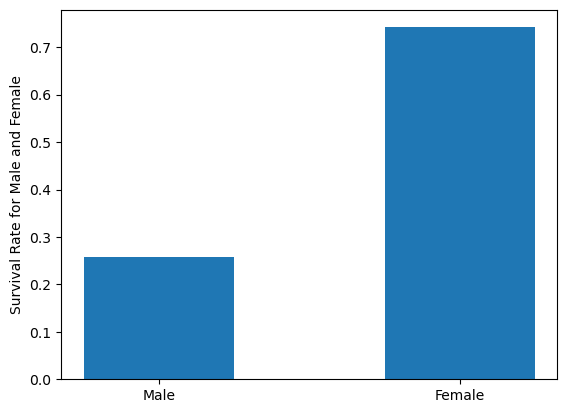

In [68]:
# your code here

plt.bar(['Male', 'Female'], df.groupby('Survived')['Sex'].sum()/df['Sex'].sum(), 0.5)
plt.ylabel('Survival Rate for Male and Female')

-> your answer here
This bar graph tells us that the female have more than 40% chance to survive than male. More women survived from titanic than men. 

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

Text(0, 0.5, 'Survival Rate for each Title')

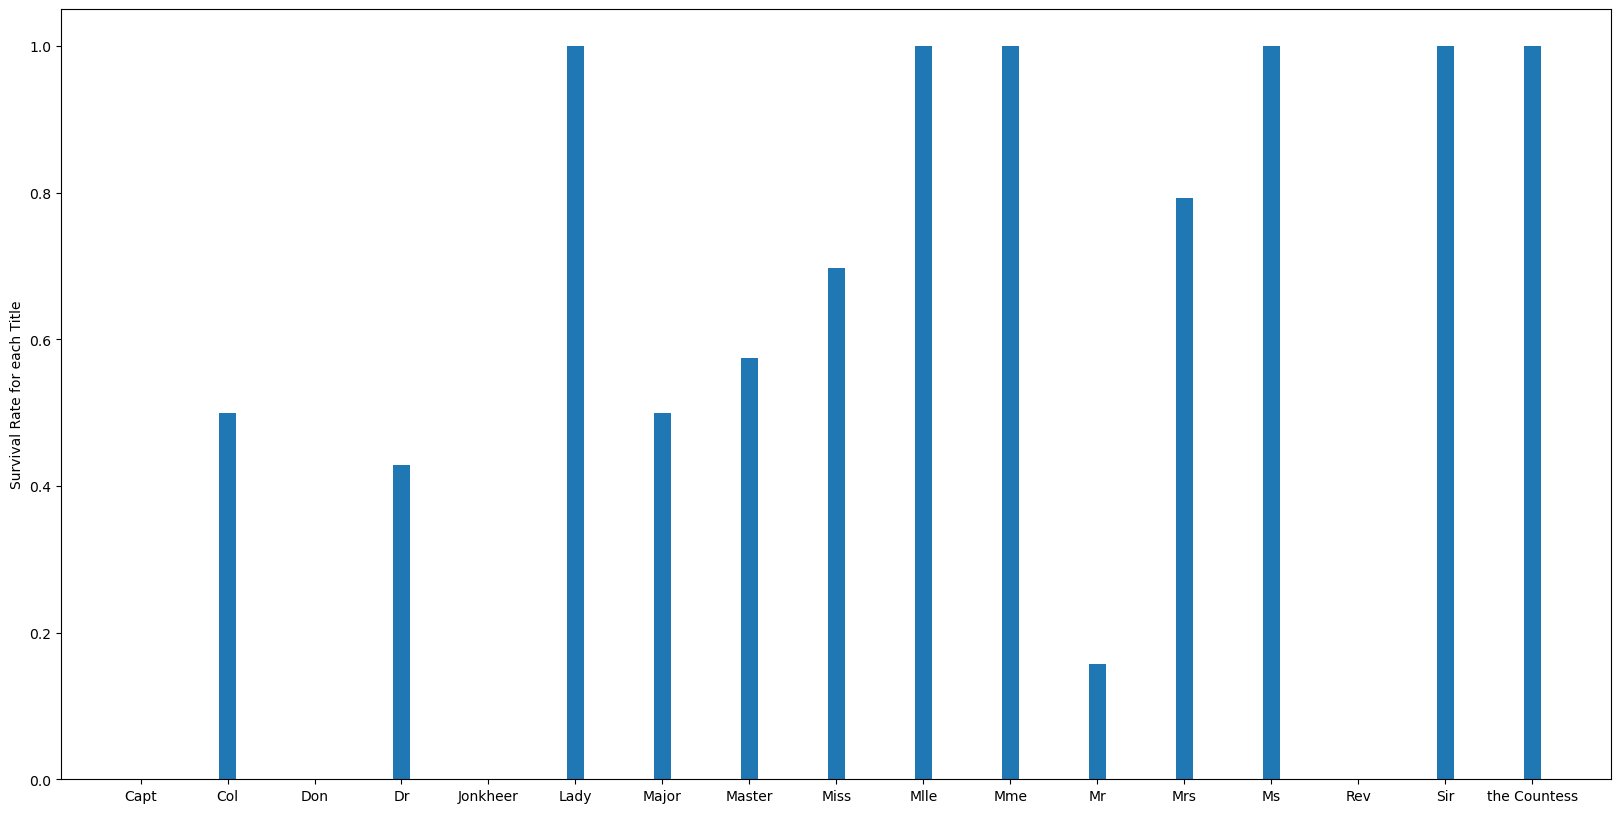

In [89]:
# your code here
df.groupby('Title')['Survived'].sum()
# df['Title'].value_counts()
# count the frequency of each title
# df['Title'].unique().tolist()

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(['Capt','Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'], df.groupby('Title')['Survived'].sum() / df['Title'].value_counts(), 0.2)
plt.ylabel('Survival Rate for each Title')

-> your answer here
Some titles have no or very low survival rate, including Capt, Don, Jonkheer and Rev. Partially it's because the base populations for these titles are small. Some titles have very high survival rates, including sir, the countess, and lady. These titles are noble titles indicating that noble people have a higher survival rate than average. Besides, Mlle, Mme, Ms, and Miss have very survival rates denoting that women have a higher survival rate than men. Mr has one of the lowest survival rate. Master have about 40% higher survival rate than Mr. 

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

Text(0, 0.5, 'Average Fare')

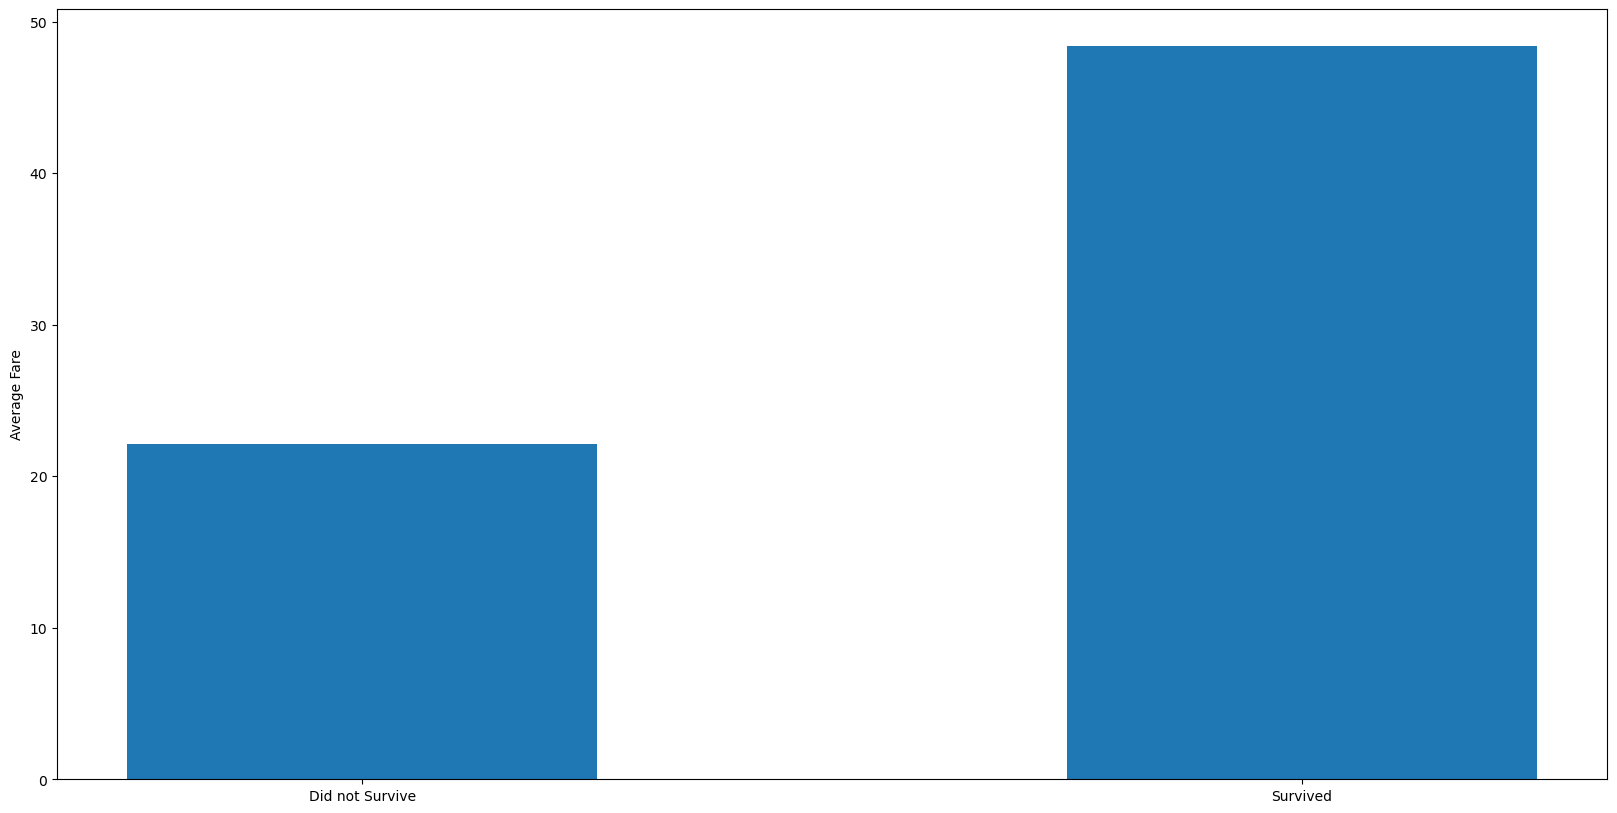

In [11]:
# your code here
# df.groupby('Survived')['Fare'].mean()
plt.bar(['Did not Survive', 'Survived'], df.groupby('Survived')['Fare'].mean(), 0.5)
plt.ylabel('Average Fare')

-> your answer here
This graph shows that the average fare of the survived population is about twice as much as that of the unsurvived population. People who bought more expensive boat tickets are more likely to survive. 

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

[Text(1, 0, 'Not survived'), Text(2, 0, 'Survived')]

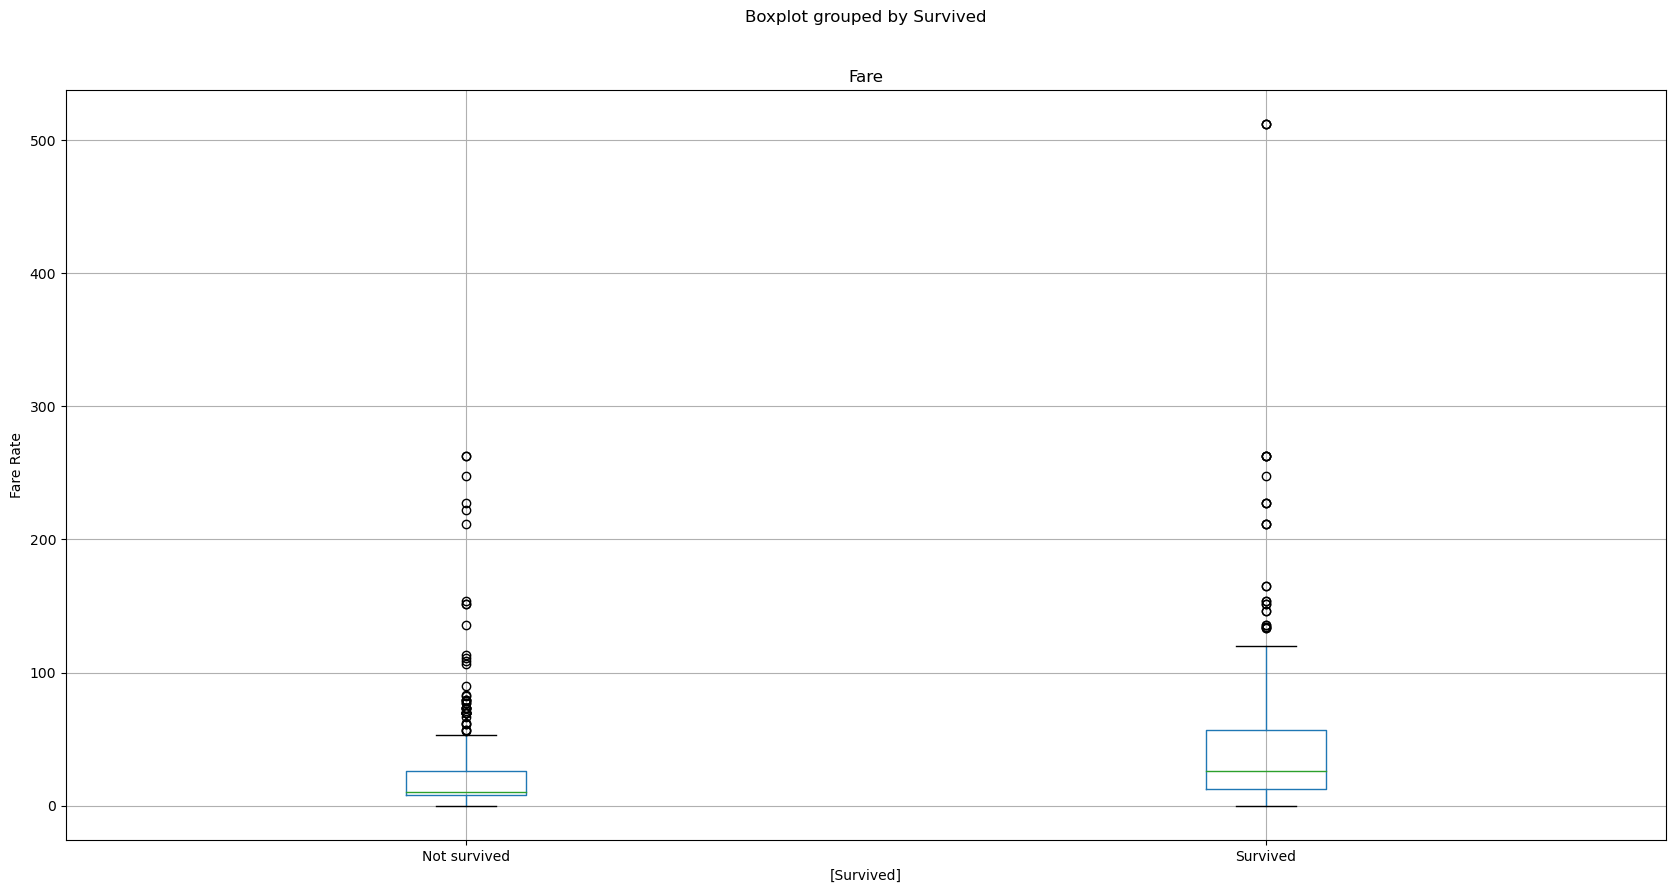

In [12]:
# your code here
mybox = df.boxplot(['Fare'], ['Survived'])
mybox.set_ylabel('Fare Rate')
mybox.set_xticklabels(['Not survived', 'Survived'])

-> your answer here
Both boxplots have skewed distribution with long whiskers extending upwards from the maximum fare. The median of the Not Survived boxplot is lower than the median of the Survived boxplot. The minimum and the Q1 quartile for both boxplots are roughly in the same place. The max of the Not Survived boxplot is much lower than the max of the Survived. Although both groups have outliers, this graph indicates the survived people are more likely to have paid higher ticket fee. 

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [90]:
# your code here
def subt_meanFare_DivbySD(df):
    return (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
    
# df = pd.read_csv('train_sample.csv') 
df['Fare'] = subt_meanFare_DivbySD(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr


In [53]:
# df_idname = df[['PassengerId','First Name']].copy()
# df_idname
# df_idname.loc[df['PassengerId'] == 368, 'First Name'].to_string(index=False)

'(Mantoura'

l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [10]:
# df = # < your code here >
df = df.select_dtypes(['number'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,-0.502163
1,2,1,1,1,38.000000,1,0,0.786404
2,3,1,3,1,26.000000,0,0,-0.488580
3,4,1,1,1,35.000000,1,0,0.420494
4,5,0,3,0,35.000000,0,0,-0.486064
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,-0.386454
887,888,1,1,1,19.000000,0,0,-0.044356
888,889,0,3,1,29.699118,1,2,-0.176164
889,890,1,1,0,26.000000,0,0,-0.044356


m) Ignoring passenger ID, write a function that returns the names of the N most similar **pairs** of passengers using the euclidean distance and ignoring pairs that have distance zero - (15 points)

In [55]:
import pandas as pd
import itertools
from scipy.spatial.distance import pdist

def calculate_dist(df, N):
    d = pd.DataFrame(itertools.combinations(df.index, 2), columns=['i','j'])
    d['dist'] = pdist(df, 'euclid')
    return d['dist']

def N_most_similar_pairs(df, N):
    res = []
    drop_d = d.index[d["dist"] == 0]
    d1 = d.drop(d.index[drop_d])
    # d1.nsmallest(N, 'dist')
    # df.iloc[d1.nsmallest(N, 'dist').j.values[2]].tolist()
    for a in range(N):
        pair = []
        pair.append(df.iloc[d1.nsmallest(N, 'dist').i.values[a]].tolist()[-1])
        pair.append(df.iloc[d1.nsmallest(N, 'dist').j.values[a]].tolist()[-1])
        res.append(pair)    
    return res


N = 3
df = pd.read_csv('train.csv') 
df = drop_na(df)
df['Sex'] = to_numerical(df)
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df['Age'] = replace_with_mean(df)
df['Fare'] = subt_meanFare_DivbySD(df)
df = df.select_dtypes(['number'])
df = df.drop('PassengerId', axis=1)
# calculate euclidean distance
d['dist'] = calculate_dist(df, N)
# add Name and passengerId column to df
df = pd.concat([df, df_idname], axis=1)
# run N_most_similar_pairs
print("The 3 most similar passengers are: " + str(N_most_similar_pairs(df, 3)))



The 3 most similar passengers are: [['Thamine', 'Joseph'], ['Matthew', 'Patrick'], ['Fatima', '(Mantoura']]


## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and challenge your understanding of clustering and kmeans.

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. Hint: the centroid of the cluster has the same dimensions as the images in the dataset. - (10 points)

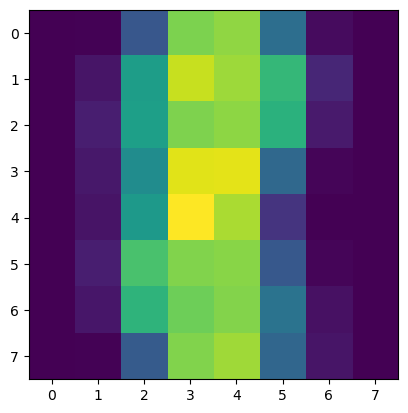

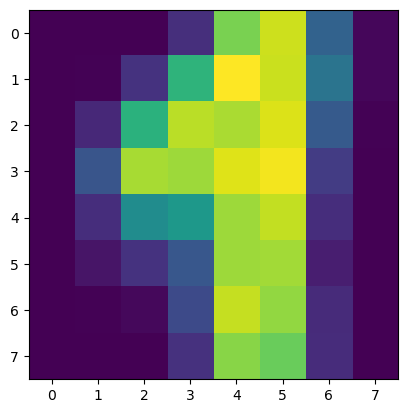

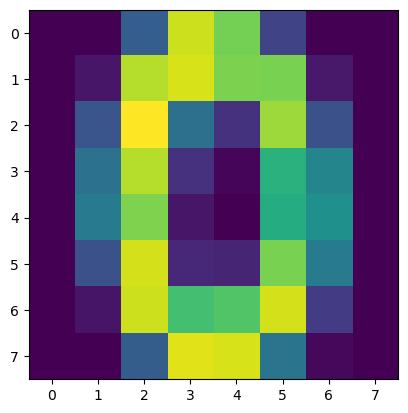

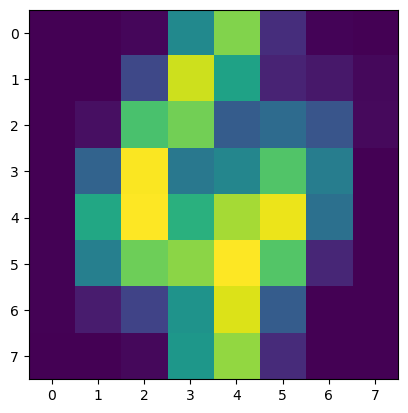

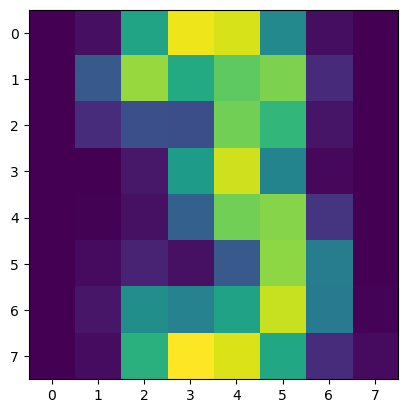

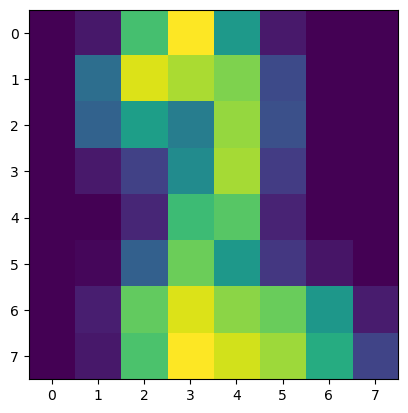

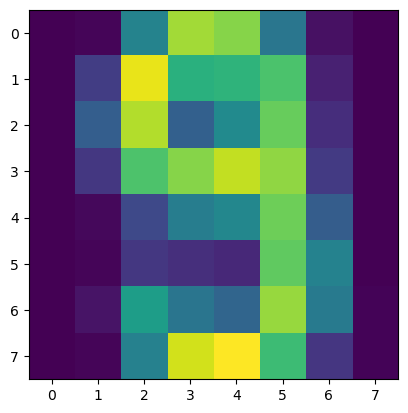

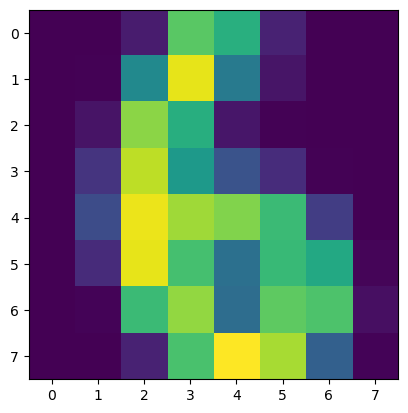

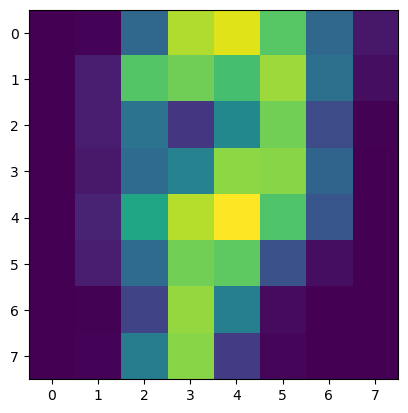

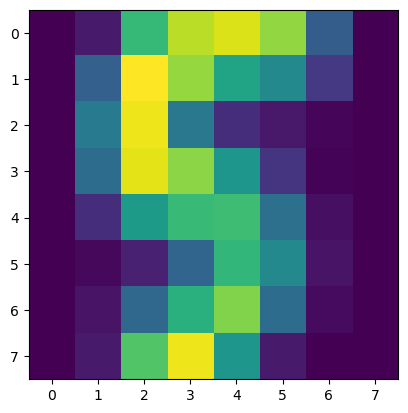

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()

# your code here
# mnist.data

# don't use mnist.image, use mnist.data
# 1797, 64
mnist.data.shape
km = KMeans(n_clusters=10)
# training data
km.fit(mnist.data)
clusterCenters = km.cluster_centers_
# 10, 64
# clusterCenters.shape
for i in range(10):
    plt.imshow(clusterCenters[i].reshape(8, 8))
    plt.show()  # display multiple images


b) Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Compare the [silhouette scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the clustering you created above to those of the clustering generated from the labels attached to each image. Explain - (10 points)

In [105]:
from sklearn.metrics import silhouette_score

# predicted labels for data
ypred = km.predict(mnist.data)
# ypred
# 1797 labels
# ypred.shape

# generate silhouette scores for mnist.data and my predicted labels. Compare them. 
# Mean Silhouette Coefficient for all samples.
dataScore = silhouette_score(mnist.data, ypred)
dataScore



0.18236224977674964

-> your answer here:
The silhouette score of the clustering I created is approximately 0.18. It's close to 0, which indicates overlaps among clusters. From the silhouette score graph below, we can tell that some clusters are good clusters with over 0.4 score which is far beyond 0.18. Some clusters perform badly and are too close to its neighboring clusters. To find the right K, we sometimes need to try a few different K numbers. Lower the K number may bring better results. 

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=10))

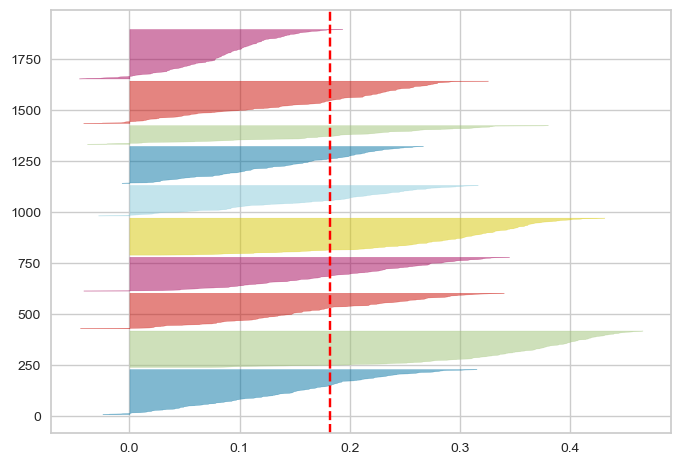

In [106]:
from yellowbrick.cluster import SilhouetteVisualizer

# Create SilhouetteVisualizer instance with KMeans instance
# Fit the visualizer
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(mnist.data)

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (5 points)

Text(0.5, 1.0, "b'camion_s_000148.png'")

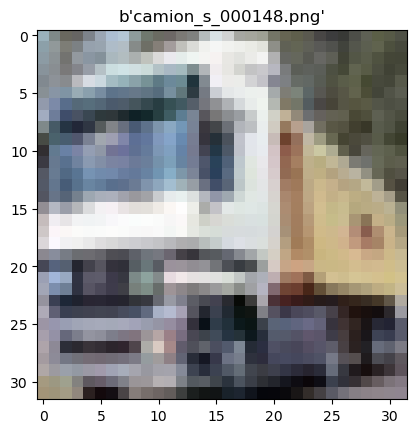

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('data_batch_1')
# batch1
# batch1[b'data']
imglabel = batch1[b'filenames'][1]
img = batch1[b'data'][1]
# reshape to 32 height, 3 channels, and width 
img_new = img.reshape(3, 32, 32).transpose(1, 2, 0)
# img_new
plt.imshow(img_new)
plt.title(imglabel)

d) This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, we are clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. We can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

For example, if the original image is the following:

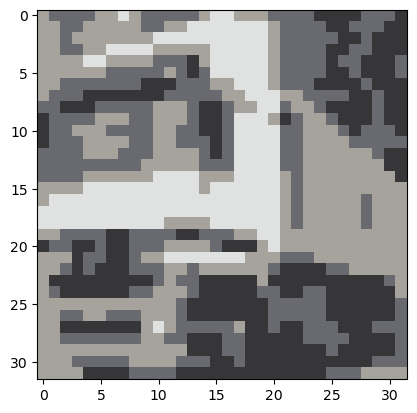

In [3]:
# img_2d, which reshapes the img_new
# 1024 * 3
img_2d = img_new.reshape(32 * 32, 3)
# img_2d

km_img = KMeans(n_clusters=4)
km_img.fit(img_2d)
imgclusterCenters = km_img.cluster_centers_
# imgclusterCenters

# 4 * 3, 4 clusters and each one has 3 centroids
# imgclusterCenters.shape
label_img = km_img.predict(img_2d)
imgg = imgclusterCenters[label_img]
# imgg.shape
imgg_reshaped = imgg.reshape(32, 32, 3)
plt.imshow(imgg_reshaped / 255)


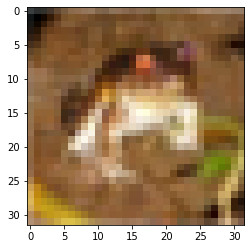

In [110]:
from IPython.display import Image
frog = Image(filename="frog.png", width=300, height=300)
frog

The transformation, using only 4 colors / centroids would look like:

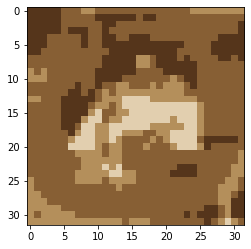

In [111]:
Image(filename="frog_4.png", width=300, height=300)

e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

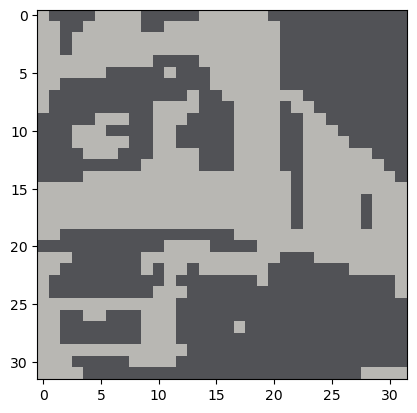

In [7]:
def anyColor(image, K):
    img_new = image.reshape(3, 32, 32).transpose(1, 2, 0)
    img_2d = img_new.reshape(32 * 32, 3)
    # img_2d

    km_img = KMeans(n_clusters = K)
    km_img.fit(img_2d)
    imgclusterCenters = km_img.cluster_centers_
    # imgclusterCenters

    # 4 * 3, 4 clusters and each one has 3 centroids
    # imgclusterCenters.shape
    label_img = km_img.predict(img_2d)
    imgg = imgclusterCenters[label_img]
    # imgg.shape
    imgg_reshaped = imgg.reshape(32, 32, 3)
    plt.imshow(imgg_reshaped / 255)


anyColor(img, 2)


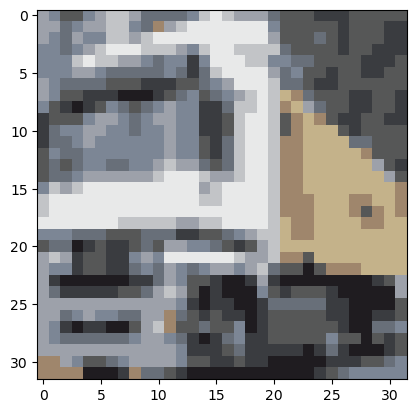

In [8]:
anyColor(img, 10)